# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I **Team, JL2**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### <u>__Predict Overview: EA - Twitter Sentiment Classification 2023-2024__</u>

* To be continued


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Text Preprocessing</a>

<a href=#five>5. Feature Engineering</a>

<a href=#six>6. Model Training</a>

<a href=#seven>7. Model Perfomance</a>

<a href=#eifght>8. Model Evaluation - Testing set</a>

<a href=#nine>9. Best Model Explanation</a>

# 1. Importing Packages


In [4]:
# Libraries of loading, manipulation and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


# Libraries for Modeling
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import re

#

# Downloads
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

# Setting global constants to ensure notebook results are reproducible

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 2.Loading Data

In [5]:
# Load the data
df_train = pd.read_csv('train.csv')
df_test =  pd.read_csv('test_with_no_labels.csv')

# 3. Exploratory Data Analysis (EDA)

### 3.1 Dataset Overview

In [6]:
# Shapes, Columns, Data types
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [7]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


### 3.2 Data Dimensionality

In [8]:
df_train.shape

(15819, 3)

- `Train data` has **15819** rows and **3** columns.

In [9]:
df_test.shape

(10546, 2)

- `Test data` has **10546** rows and **2** columns.

### 3.3 Information Summmary

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Notable insight for `Train data`:
-  **Categoric**: **1** column of categorical type [`message`]
-  **Numerical**: **2** columns of Numeric type [`sentiment` & `tweetid`]
- **Null data**: Zero null values

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


Notable insight for `Test data`:
-  **Categoric**: **1** column of categorical type [`message`]
-  **Numerical**: **1** column of Numeric type [`tweetid`]
- **Null data**: Zero null values

### 3.4 Null value analysis

In [12]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [13]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

- Both `train data` & `test data` have **ZERO** null values.

### 3.5 Sentiment Class Distribution

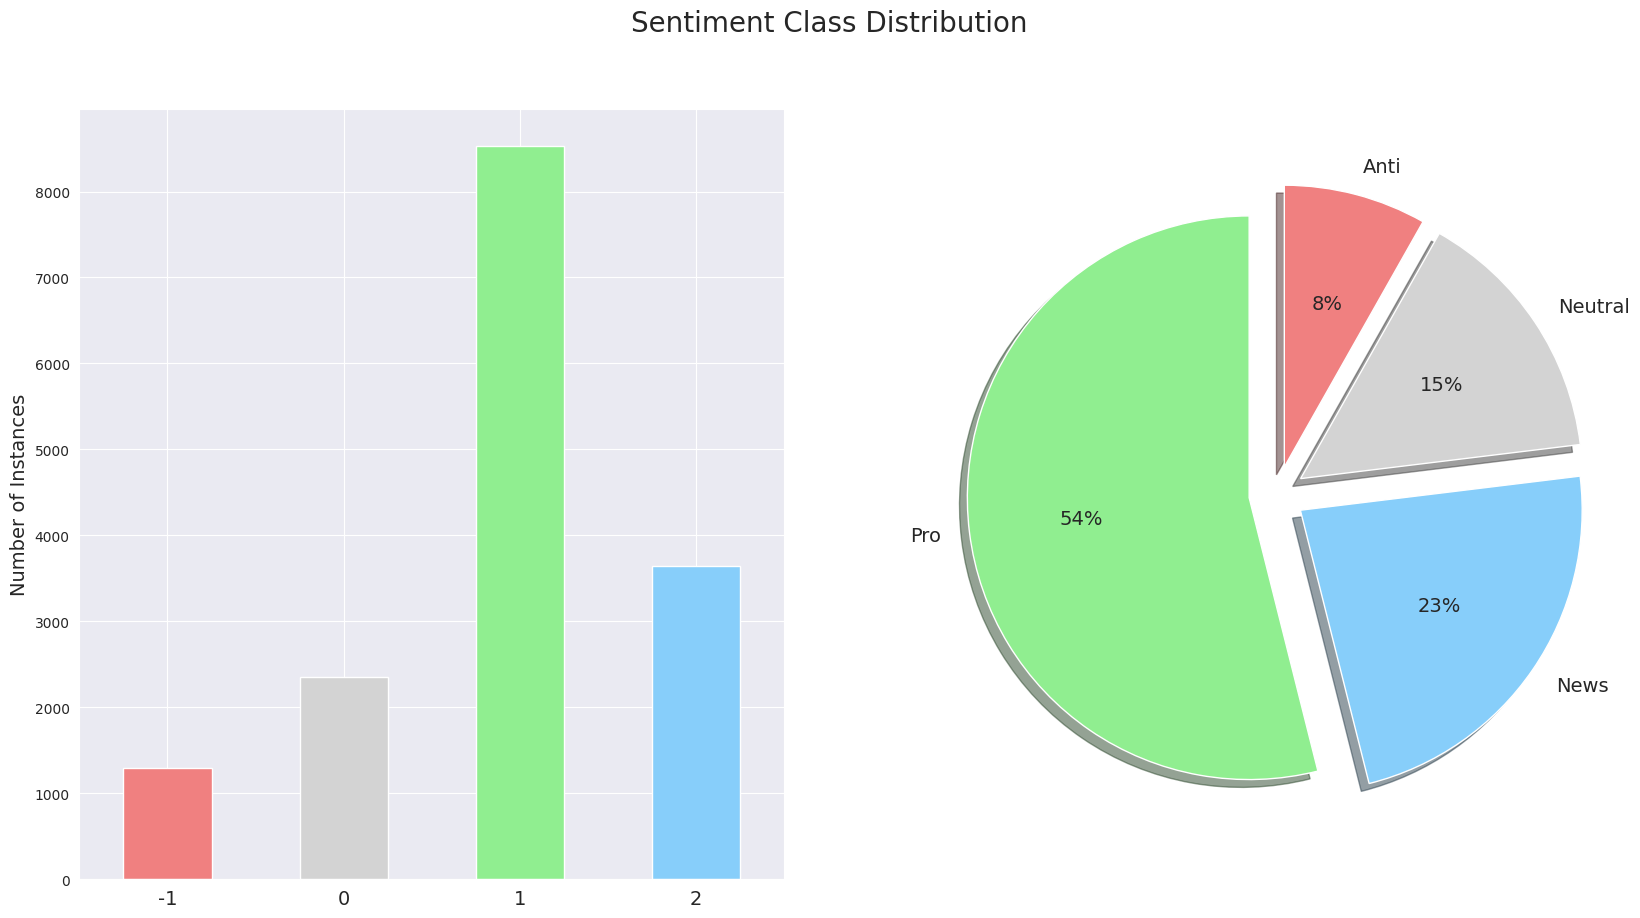

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color scheme with lighter shades
color_scheme = {'2': 'lightskyblue', '1': 'lightgreen', '0': 'lightgrey', '-1': 'lightcoral'}

# Set Seaborn style
sns.set_style('darkgrid')

fig, axes = plt.subplots(ncols=2,
                         nrows=1,
                         figsize=(20, 10),
                         dpi=100)

# Bar plot with color scheme using pandas
bar_plot = df_train['sentiment'].value_counts().sort_index().plot(kind='bar', color=[color_scheme[str(i)] for i in range(-1, 3)], ax=axes[0])
axes[0].set_ylabel('Number of Instances', fontsize=14)

# Adjust x-axis tick label rotation and make them bold
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=0, fontsize=14)  # Adjust font size

# Pie chart with color scheme
labels_pie = ['Pro', 'News', 'Neutral', 'Anti']  # Corrected labels
colors_pie = [color_scheme['1'], color_scheme['2'], color_scheme['0'], color_scheme['-1']]  # Corrected colors
axes[1].pie(df_train['sentiment'].value_counts(),
            labels=labels_pie,
            autopct='%1.0f%%',
            shadow=True,
            startangle=90,
            explode=(0.1, 0.1, 0.1, 0.1),
            colors=colors_pie,
            textprops={'fontsize': 14})  # Adjust font size

fig.suptitle('Sentiment Class Distribution', fontsize=20)
plt.show()


- Notable differences exist in the number of instances for each sentiment class, with `Pro (class 1)` having the **highest** number of observations(**54%**), and `Anti (class -1)` with the **lowest** number of observations(**8%**).
- The imbalance in class frequencies may pose a potential challenge for our machine learning models.

### 3.6 Tweet Lengths Overview


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


- Comment!

# 4. Text Pre-Processing

#### Combine train & test data

In [16]:
# Combine training and test data for preprocessing
df_combined = pd.concat([df_train, df_test], axis=0, ignore_index=True)

In [17]:
# Assuming df_train is your DataFrame
df_combined['sentiment'] = df_train['sentiment'].astype('int64')

In [18]:
# Add a new column 'clean_message' with a copy of the original 'message' next to it
df_combined.insert(df_combined.columns.get_loc('message') + 1, 'clean_message', df_combined['message'].copy())

In [19]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,It's not like we lack evidence of anthropogeni...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,RT @RawStory: Researchers say we have three ye...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...","RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [20]:
df_combined.shape

(26365, 4)

#### 4.1 Lowercasing

In [21]:
df_combined['clean_message'] = df_combined['clean_message'].str.lower()

In [22]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesn't think carbon di...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,it's not like we lack evidence of anthropogeni...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,rt @rawstory: researchers say we have three ye...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,#todayinmaker# wired : 2016 was a pivotal year...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...","rt @soynoviodetodas: it's 2016, and a racist, ...",466954


#### 4.1.2 Handle Hashtags(#)

In [23]:
def hashtag_extract(tweet):

    """
    This function takes in a tweet and extracts the top 15 hashtag(s) using regular expressions
    These hashtags are stored in a seperate dataframe
    along with a count of how frequenty they occur

    Input:
    tweet: original tweets
           datatype: 'str'

    Output:
    hashtag_df: dataframe containing the top hashtags in the tweets
              datatype: dataframe
    """

    hashtags = []

    for i in tweet:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    hashtags = sum(hashtags, [])
    frequency = nltk.FreqDist(hashtags)

    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                       'count': list(frequency.values())})
    hashtag_df = hashtag_df.nlargest(15, columns="count")

    return hashtag_df

df_temp_Hashtag = df_combined.iloc[:len(df_train)].copy()

# Extracting the hashtags from tweets in each class
pro = hashtag_extract(df_temp_Hashtag['clean_message'][df_temp_Hashtag['sentiment'] == 1])
anti = hashtag_extract(df_temp_Hashtag['clean_message'][df_temp_Hashtag['sentiment'] == -1])
neutral = hashtag_extract(df_temp_Hashtag['clean_message'][df_temp_Hashtag['sentiment'] == 0])
news = hashtag_extract(df_temp_Hashtag['clean_message'][df_temp_Hashtag['sentiment'] == 2])


In [24]:
pro.head()

,hashtag,count
19,climate,188
17,beforetheflood,148
45,climatechange,120
13,imvotingbecause,62
4,cop22,59


#### 4.2 Removing URLs and User(@)

In [25]:
df_combined['clean_message'] = df_combined['clean_message'].replace(r'http\S+', '', regex=True).replace(r'@[\w_]+', '', regex=True)

In [26]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesn't think carbon di...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,it's not like we lack evidence of anthropogeni...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,rt : researchers say we have three years to ac...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,#todayinmaker# wired : 2016 was a pivotal year...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...","rt : it's 2016, and a racist, sexist, climate ...",466954


#### 4.3 Remove Punctuation & Special Characters

In [27]:
df_combined['clean_message'] = df_combined['clean_message'].replace(r'[^\w\s]', '', regex=True)

In [28]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesnt think carbon dio...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,its not like we lack evidence of anthropogenic...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,rt researchers say we have three years to act...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,todayinmaker wired 2016 was a pivotal year in...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",rt its 2016 and a racist sexist climate chang...,466954


#### 4.4 Remove RT

In [29]:
# Replace 'RT' with an empty string in the 'clean_message' column
df_combined['clean_message'] = df_combined['clean_message'].replace(r'\brt\b', '', regex=True)

In [30]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesnt think carbon dio...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,its not like we lack evidence of anthropogenic...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,researchers say we have three years to act o...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,todayinmaker wired 2016 was a pivotal year in...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",its 2016 and a racist sexist climate change ...,466954


#### 4.5 Remove Special Characters & Handle Encoding

In [31]:
# Remove special characters (handling encoding issues)
df_combined['clean_message'] = df_combined['clean_message'].replace(r'[^\x00-\x7F]+', '', regex=True)

In [32]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesnt think carbon dio...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,its not like we lack evidence of anthropogenic...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,researchers say we have three years to act o...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,todayinmaker wired 2016 was a pivotal year in...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",its 2016 and a racist sexist climate change ...,466954


#### 4.6 Remove repeating characters

In [33]:
def check_repeating_characters(dataframe, column_name='clean_message'):

    # Extract repeating characters from the specified column
    repeating_characters = dataframe[column_name].str.extract(r'((.)\2+)')

    # Check if any repeating characters were found
    repeating_characters_exist = not repeating_characters.isnull().all().all()

     # Print the result
    if repeating_characters_exist:
        print("Repeating characters exist in the '{}' column.".format(column_name))
    else:
        print("No repeating characters found in the '{}' column.".format(column_name))

In [34]:
check_repeating_characters(df_combined)

Repeating characters exist in the 'clean_message' column.


In [35]:
# Replace repeating characters with a single instance in the 'clean_message' column
df_combined['clean_message'] = df_combined['clean_message'].replace(r'(.)\1+', r'\1', regex=True)

In [36]:
check_repeating_characters(df_combined)

No repeating characters found in the 'clean_message' column.


#### 4.7 Remove numeric numbers

In [37]:
# Remove numeric numbers from the 'clean_message' column
df_combined['clean_message'] = df_combined['clean_message'].replace(r'\d+', '', regex=True)

In [38]:
# Filter rows where 'message' column had numbers
rows_with_numbers = df_combined[df_combined['message'].str.contains(r'\d+')]

# Display a sample of rows with 'message' and 'clean_message'
sample_rows_with_numbers = rows_with_numbers.sample(5)

sample_rows_with_numbers[['message', 'clean_message']]

,message,clean_message
1276,RT @climatehawk1: Scientists just published an...,scientists just published an entire study ref...
24917,RT @TIME: Gov. Brown vows to fight Trump on cl...,gov brown vows to fight trump on climate chan...
13962,RT @Innisfree: #citizenscience can help people...,citizenscience can help people learn about cl...
6444,RT @RogueNASA: Oh. EPA chief Scott Pruitt says...,oh epa chief scot pruit says co not a primary...
22503,RT @nanjmay6478: Gore left his failed bid in 2...,gore left his failed bid in with very litle ...


#### 4.8 Remove extra white space & leading space

In [39]:
# Remove extra white spaces in the 'message' column
df_combined['clean_message'] = df_combined['clean_message'].str.replace('\s{2,}', ' ', regex=True)

# Remove leading spaces in the 'message' column
df_combined['clean_message'] = df_combined['clean_message'].str.lstrip()

#### 4.9 Remove Stopwords

In [40]:
# A set of stop words
STOPWORDS = set(stopwords.words('english'))

# Function to clean stopwords from text
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [41]:
# Apply the function to the 'clean_message' column of df_combined
df_combined['clean_message'] = df_combined['clean_message'].apply(lambda text: cleaning_stopwords(text))

In [42]:
df_combined.head()

,sentiment,message,clean_message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesnt think carbon dio...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,like lack evidence anthropogenic global warming,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,researchers say thre years act climate change ...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,todayinmaker wired pivotal year war climate ch...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",racist sexist climate change denying bigot lea...,466954


### 4.10 Normalization

#### 4.10.1 Tokenization

In [43]:
# Function to tokenize a sentence
def tokenize_sentence(sentence):
    tokens = word_tokenize(sentence)
    return tokens

In [44]:
# Apply tokenization to the 'message' column in df_train
df_combined['tokens'] = df_combined['clean_message'].apply(tokenize_sentence)


df_combined[['clean_message', 'tokens', 'sentiment']].head()

,clean_message,tokens,sentiment
0,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb...",1.0
1,like lack evidence anthropogenic global warming,"[like, lack, evidence, anthropogenic, global, ...",1.0
2,researchers say thre years act climate change ...,"[researchers, say, thre, years, act, climate, ...",2.0
3,todayinmaker wired pivotal year war climate ch...,"[todayinmaker, wired, pivotal, year, war, clim...",1.0
4,racist sexist climate change denying bigot lea...,"[racist, sexist, climate, change, denying, big...",1.0


In [45]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26365 entries, 0 to 26364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sentiment      15819 non-null  float64
 1   message        26365 non-null  object 
 2   clean_message  26365 non-null  object 
 3   tweetid        26365 non-null  int64  
 4   tokens         26365 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.0+ MB


#### 4.10.2 Stemming

In [46]:
# Function to perform stemming on a sentence
def stem_sentence(sentence):
    stemmer = PorterStemmer()
    tokens = word_tokenize(sentence)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

In [47]:
# Apply stemming to the 'tokens' column in df_combined
df_combined['stemms'] = df_combined['tokens'].apply(lambda tokens: [stem_sentence(token) for token in tokens])

# Reorder columns to have 'stemms' next to 'tokens'
df_combined = df_combined[['tweetid','message','clean_message', 'tokens', 'stemms','sentiment']]

In [48]:
df_combined[['tokens', 'stemms']].tail()

,tokens,stemms
26360,"[brb, writing, poem, climate, change, climatec...","[brb, write, poem, climat, chang, climatechang..."
26361,"[year, climate, change, came, home, hotest, ye...","[year, climat, chang, came, home, hotest, year..."
26362,"[pacific, countries, positive, fiji, leading, ...","[pacif, countri, posit, fiji, lead, global, cl..."
26363,"[youre, hot, must, cause, global, warming, ald...","[your, hot, must, caus, global, warm, aldublab..."
26364,"[climate, change, global, isue, thats, geting,...","[climat, chang, global, isu, that, gete, wors,..."


In [49]:
df_combined.columns

Index(['tweetid', 'message', 'clean_message', 'tokens', 'stemms', 'sentiment'], dtype='object')

#### 4.9.3 Lemmatization

In [50]:
# Still under production

In [51]:
# Split the combinded data frame back to train & test data
df_train = df_combined.iloc[:len(df_train)]
df_test = df_combined.iloc[len(df_train):]

In [52]:
# Check if they were correctly Seperated
print(df_train.shape)
print(df_test.shape)

(15819, 6)
(10546, 6)


In [53]:
###

# 5. Feature Engineering

### Climate change trending words

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

def frequency_by_sentiment(tweet_series, sentiment_value):
    """
    This function determines the frequency of each word in a collection of tweets for a specific sentiment class
    and stores the 25 most frequent words in a dataframe,
    sorted from most to least frequent

    Input:
    tweet_series: series containing original tweets
                  datatype: pandas Series
    sentiment_value: sentiment class value (e.g., 1, -1, 2, 0)
                     datatype: int

    Output:
    frequency: dataframe containing the top 25 words for the specified sentiment class
               datatype: dataframe
    """

    # Filter tweets for the specified sentiment class
    filtered_tweets = tweet_series[df_train['sentiment'] == sentiment_value]

    # Join the list of stemmed words into a space-separated string
    filtered_tweets_str = filtered_tweets.apply(lambda x: ' '.join(x))

    # Count vectorizer excluding English stopwords
    cv = CountVectorizer(stop_words='english')
    words = cv.fit_transform(filtered_tweets_str)

    # Count the words in the tweets and determine the frequency of each word
    sum_words = words.sum(axis=0)
    words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Create a dataframe to store the top 25 words and their frequencies
    frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
    frequency = frequency.head(25)

    return frequency


In [61]:
# Extract the top 25 words in each class
pro_frequency = frequency_by_sentiment(df_train['stemms'],1)
anti_frequency = frequency_by_sentiment(df_train['stemms'],-1)
news_frequency = frequency_by_sentiment(df_train['stemms'],2)
neutral_frequency = frequency_by_sentiment(df_train['stemms'],0)

In [62]:
pro_frequency

,word,freq
0,climat,7370
1,chang,7212
2,global,1601
3,warm,1489
4,believ,1122
5,trump,1100
6,think,793
7,doesnt,788
8,amp,661
9,wil,634


## Modeling preparation

In [ ]:
# Feature Selection, Data Split, Data Scaling etc

In [ ]:
df_train['stemms'] = df_train['stemms'].apply(np.array)


In [ ]:

# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(df_train['stemms'], df_train['sentiment'], test_size=0.2, random_state=42)


# 6. Model Training

### 6.1 Random Forest

In [ ]:


# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline with TF-IDF vectorizer and Random Forest classifier
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', rf_classifier),
])

# Fit the model on the training data
pipeline.fit(X_train.apply(lambda x: ' '.join(x)), y_train)

# Predictions on the validation set
y_pred = pipeline.predict(X_validation.apply(lambda x: ' '.join(x)))

# Evaluate the model
accuracy = accuracy_score(y_validation, y_pred)
classification_rep = classification_report(y_validation, y_pred)

print(f'Accuracy: {accuracy:.4f}\n')
print('Classification Report:\n', classification_rep)

### 6.2 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Create a pipeline with TF-IDF vectorizer and Logistic Regression classifier
logreg_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', logreg_classifier),
])

# Fit the model on the training data
logreg_pipeline.fit(X_train.apply(lambda x: ' '.join(x)), y_train)

# Predictions on the validation set
logreg_y_pred = logreg_pipeline.predict(X_validation.apply(lambda x: ' '.join(x)))

# Evaluate the Logistic Regression model
logreg_accuracy = accuracy_score(y_validation, logreg_y_pred)
logreg_classification_rep = classification_report(y_validation, logreg_y_pred)

print(f'Logistic Regression Accuracy: {logreg_accuracy:.4f}\n')
print('Logistic Regression Classification Report:\n', logreg_classification_rep)

### 6.3 Support Vector Machine

In [ ]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Create a Support Vector Machine classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Create a pipeline with TF-IDF vectorizer and SVM classifier
svm_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', svm_classifier),
])

# Fit the model on the training data
svm_pipeline.fit(X_train.apply(lambda x: ' '.join(x)), y_train)

# Predictions on the validation set
svm_y_pred = svm_pipeline.predict(X_validation.apply(lambda x: ' '.join(x)))

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_validation, svm_y_pred)
svm_classification_rep = classification_report(y_validation, svm_y_pred)

print(f'SVM Accuracy: {svm_accuracy:.4f}\n')
print('SVM Classification Report:\n', svm_classification_rep)


### 6.4 Naive Bayes

In [ ]:
# Create a Naive Bayes classifier (Multinomial Naive Bayes for text classification)
naive_bayes_classifier = MultinomialNB()

# Create a pipeline with TF-IDF vectorizer and Naive Bayes classifier
naive_bayes_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', naive_bayes_classifier),
])

# Fit the model on the training data
naive_bayes_pipeline.fit(X_train.apply(lambda x: ' '.join(x)), y_train)

# Predictions on the validation set
naive_bayes_y_pred = naive_bayes_pipeline.predict(X_validation.apply(lambda x: ' '.join(x)))

# Evaluate the Naive Bayes model
naive_bayes_accuracy = accuracy_score(y_validation, naive_bayes_y_pred)
naive_bayes_classification_rep = classification_report(y_validation, naive_bayes_y_pred)

print(f'Naive Bayes Accuracy: {naive_bayes_accuracy:.4f}\n')
print('Naive Bayes Classification Report:\n', naive_bayes_classification_rep)


### 6.5 KNeighbors Classifier

In [ ]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Create a pipeline with TF-IDF vectorizer and KNN classifier
knn_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', knn_classifier),
])

# Fit the model on the training data
knn_pipeline.fit(X_train.apply(lambda x: ' '.join(x)), y_train)

# Predictions on the validation set
knn_y_pred = knn_pipeline.predict(X_validation.apply(lambda x: ' '.join(x)))

# Evaluate the KNN model
knn_accuracy = accuracy_score(y_validation, knn_y_pred)
knn_classification_rep = classification_report(y_validation, knn_y_pred)

print(f'KNN Accuracy: {knn_accuracy:.4f}\n')
print('KNN Classification Report:\n', knn_classification_rep)

In [ ]:
# Train Models

# 7. Model Perfomance

In [ ]:
# Use various Metrics to evaluate each model's perfomance

# 8. Model Evaluation - Testing set

In [ ]:
# Evaluate the best model on the testing set

# 9. Best Model Explanation

# Submission

In [ ]:
# Create a submission file